In [9]:
import cv2
import numpy as np
from common_functions import *




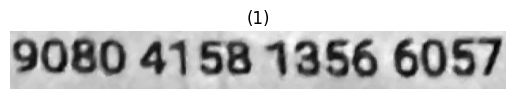

In [10]:
# Load the image
image = cv2.imread("../templates/sample.png")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_images([grayImage])



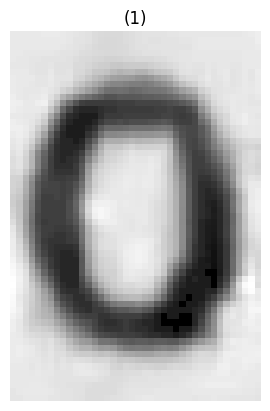

In [11]:
# Load digit templates (e.g., templates for 0-9)
digitTemplates = {}
for digit in [0,1,3,4,5,6,7,8,9]:
    templatePath = f"../templates/{digit}.png"
    digitTemplates[digit] = cv2.imread(templatePath, cv2.IMREAD_GRAYSCALE)
show_images([digitTemplates[0]])




In [12]:
def nonMaximumSuppression(boxes, scores, threshold=0.5):
    if len(boxes) == 0:
        return []

    # Convert boxes to numpy array
    boxes = np.array(boxes)
    scores = np.array(scores)

    # Compute areas of the boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 0] + boxes[:, 2]
    y2 = boxes[:, 1] + boxes[:, 3]
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # Sort by score (highest to lowest)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / areas[order[1:]]

        order = order[np.where(overlap <= threshold)[0] + 1]

    return keep

Extracted 16-digit number: 90804153813566057


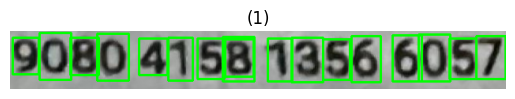

In [15]:
threshold = 0.84 #simmilarity threshold between obtained and template
# Template matching with NMS
extractedNumbers = []

for digit, template in digitTemplates.items():
    res = cv2.matchTemplate(grayImage, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)

    # Store matches as (x, y, width, height) and scores
    matches = []
    scores = []
    for pt in zip(*loc[::-1]):  # Reverse x, y order
        matches.append((pt[0], pt[1], template.shape[1], template.shape[0]))
        scores.append(res[pt[1], pt[0]])

    # Apply NMS
    keep = nonMaximumSuppression(matches, scores, threshold=0.3) #this is done so that same digit not detected severla times for intersecting boxes
    for i in keep:
        x, y, w, h = matches[i]
        extractedNumbers.append((x, digit))
        # Draw rectangle on the original image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Sort detected digits by their x-coordinate
extractedNumbers.sort(key=lambda x: x[0])
extracted_number = "".join(str(digit) for _, digit in extractedNumbers)

print("Extracted 16-digit number:", extracted_number)
show_images([image])

